Name: Adnan Shaikh<br>
Batch: DST 10224

# Image Classification of Six Emotions Using Sentiment Analysis with Convolutional Neural Networks

### Downloaded my Kaggle API file (stored in my drive) and stored it in the .kaggle folder in the root directory.

In [ ]:
!pip install gdown
import gdown
import os

#creating .kaggle folder in root
os.makedirs('/root/.kaggle', exist_ok = True)

#id of the kaggle api file in my drive
file_id = '1cvPwbUHSiDFzI9rRl_jI7yLaTzviNRQt'

#initialising file of my api
output = '/root/.kaggle/kaggle.json'

#downloading my kaggle api file
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet = False)

Downloading...
From: https://drive.google.com/uc?id=1cvPwbUHSiDFzI9rRl_jI7yLaTzviNRQt
To: /root/.kaggle/kaggle.json
100%|██████████| 65.0/65.0 [00:00<00:00, 55.1kB/s]


'/root/.kaggle/kaggle.json'

### Downloading the dataset from kaggle and unzipping it.

In [ ]:
#downloading the dataset file from kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d yousefmohamed20/sentiment-images-classifier

Dataset URL: https://www.kaggle.com/datasets/yousefmohamed20/sentiment-images-classifier
License(s): Apache 2.0
 83% 95.0M/114M [00:00<00:00, 130MB/s]
100% 114M/114M [00:00<00:00, 127MB/s] 


In [ ]:
#unzipping the downloaded file
!unzip -q /content/sentiment-images-classifier.zip -d /content/sentiment

### Importing the initially required libraries.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Storing the folder path for each class of emotion.

In [ ]:
anger_path = "/content/sentiment/6 Emotions for image classification/anger"
disgust_path = "/content/sentiment/6 Emotions for image classification/disgust"
fear_path = "/content/sentiment/6 Emotions for image classification/fear"
happy_path = "/content/sentiment/6 Emotions for image classification/happy"
pain_path = "/content/sentiment/6 Emotions for image classification/pain"
sad_path = "/content/sentiment/6 Emotions for image classification/sad"

### Converting all images into JPEG format, resizing them all to 1024x1024 resolution and converting all images to RGB images for consistency. Storing these updated images in a new folder and returning the new path of this folder.

In [ ]:
from PIL import Image

#function to standardize the images
def imgStd(input_folder, output_folder, target_size = (1024, 1024)):

    #creating the output folder if it does not exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    #iterating over each image
    for file in os.listdir(input_folder):
        input_filepath = os.path.join(input_folder, file)
        output_filepath = os.path.join(output_folder, file)

        #try block to avoid errors in any conversion
        try:
            with Image.open(input_filepath) as img:
                #converting the image to RGB
                img = img.convert('RGB')

                #resizing the image
                img = img.resize(target_size)

                #check if image is of jpeg format
                if img.format != "JPEG":
                    #if not then convert it into jpeg
                    img.save(os.path.join(output_folder, os.path.splitext(file)[0] + '.jpg'))
        except Exception as e:
            print(f"Error converting {file}: {e}")

    #returning the new folder
    return output_folder

In [ ]:
#calling the imgStd function to standardize the images and update the old folder paths with new ones

anger_path = imgStd(anger_path, "/content/sentimentUpdated/anger")
disgust_path = imgStd(disgust_path, "/content/sentimentUpdated/disgust")
fear_path = imgStd(fear_path, "/content/sentimentUpdated/fear")
pain_path = imgStd(pain_path, "/content/sentimentUpdated/pain")
sad_path = imgStd(sad_path, "/content/sentimentUpdated/sad")
happy_path = imgStd(happy_path, "/content/sentimentUpdated/happy")

### Creating a new function that accepts the folder containing the images and class of the images in that folder as parameters.<br>
### This function creates a dataframe with three columns:<br>
### 1. filepaths: exact filepath of each image in the folder
### 2. emotion: class of the image
### 3. title: file name of the image with extension

In [ ]:
def create_df(folder, class_name):

    #forming a list containing the complete path of each image in the input folder
    filepaths = [os.path.join(folder, file) for file in os.listdir(folder)]

    #forming a dictionary to form a datafram on
    data = {'filepaths': filepaths, 'emotion': [class_name] * len(filepaths), 'title': [os.path.basename(fp) for fp in filepaths]}

    #returning the formed dataframe
    return pd.DataFrame(data)

In [ ]:
#calling the create_df function to form a dataframe for each class of image.

anger_df = create_df(anger_path, 'anger')
disgust_df = create_df(disgust_path, 'disgust')
fear_df = create_df(fear_path, 'fear')
happy_df = create_df(happy_path, 'happy')
pain_df = create_df(pain_path, 'pain')
sad_df = create_df(sad_path, 'sad')

### Concatinating the dataframes created above into one to have one complete dataset containing the filepaths of all the images, their file names and class names and storing it as a csv file for backup.

In [ ]:
df = pd.concat([anger_df, disgust_df, fear_df, happy_df, pain_df, sad_df], ignore_index = True)
df.to_csv('sentiments.csv', index = False)

In [ ]:
df.head(10)

,filepaths,emotion,title
0,/content/sentimentUpdated/anger/gthmpih8udn51e...,anger,gthmpih8udn51ec8eo.jpg
1,/content/sentimentUpdated/anger/shot-of-a-youn...,anger,shot-of-a-young-businesswoman-yelling-while-us...
2,/content/sentimentUpdated/anger/road-rage-enra...,anger,road-rage-enraged-young-woman-260nw-1724744341...
3,/content/sentimentUpdated/anger/gam6lrnz3xeebd...,anger,gam6lrnz3xeebdpanc.jpg
4,/content/sentimentUpdated/anger/Screenshot-201...,anger,Screenshot-2019-11-08-at-11.42.49.jpg
5,/content/sentimentUpdated/anger/I-hate-my-job.jpg,anger,I-hate-my-job.jpg
6,/content/sentimentUpdated/anger/g6ic2rihk9g63m...,anger,g6ic2rihk9g63m51h7.jpg
7,/content/sentimentUpdated/anger/young-caucasia...,anger,young-caucasian-man-angry-frustrated-and-furio...
8,/content/sentimentUpdated/anger/woman-at-compu...,anger,woman-at-computer.jpg
9,/content/sentimentUpdated/anger/gr0n9z2if2cr0v...,anger,gr0n9z2if2cr0v5rch.jpg


### Checking for any duplicates.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  1200 non-null   object
 1   emotion    1200 non-null   object
 2   title      1200 non-null   object
dtypes: object(3)
memory usage: 28.2+ KB


### Plotting the amount of images we have for each class. Clearly we have the most amount of images for the class "happy".

<Axes: xlabel='emotion'>

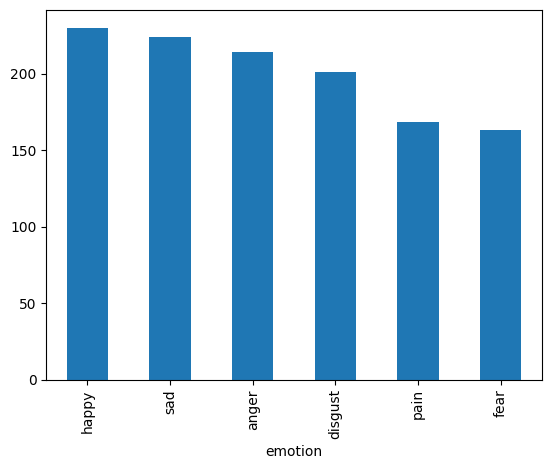

In [ ]:
df['emotion'].value_counts().plot(kind='bar')

### Displaying random images from our dataset.

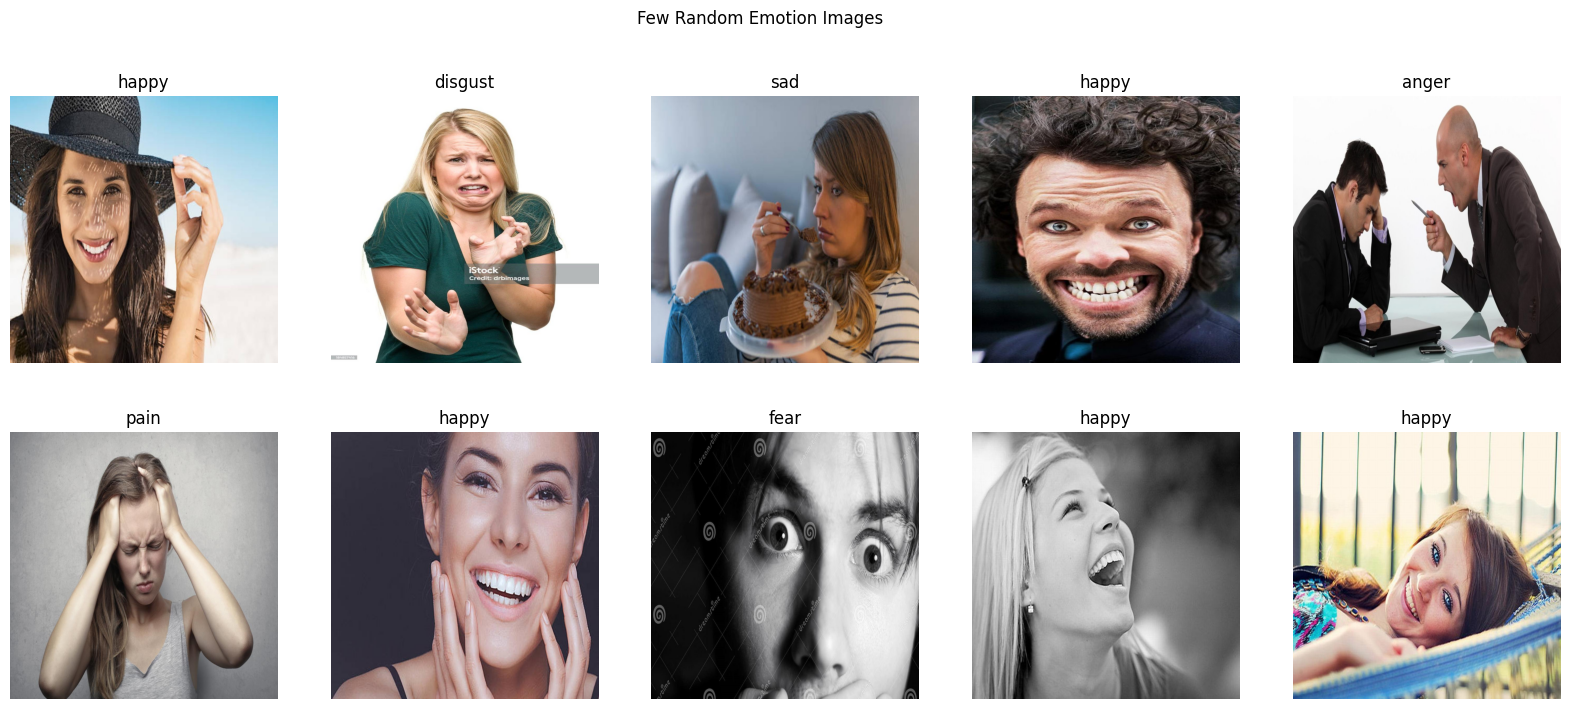

In [ ]:
import random

#selecting ten random indices
random_indices = random.sample(range(len(df)), 10)

#displaying the images at the random indices
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
plt.suptitle("Few Random Emotion Images")

for i, idx in enumerate(random_indices):
    path = df['filepaths'].iloc[idx]

    #opening the image and creating an object
    image = Image.open(f"{path}")

    #displaying the image and setting title of each image plot with its respective class
    axes[i // 5, i % 5].imshow(image)
    axes[i // 5, i % 5].set_title(f'{df["emotion"].iloc[idx]}')
    axes[i // 5, i % 5].axis('off')

plt.show()

### Splitting the data into three set: train, test and validation.<br>
### 80% data for training, 10% for testing and 10% for validation. <br>
### However I did not use this test split for testing the model which I will explain later on.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 70% train and 30% temp
train_df, temp_df = train_test_split(df, train_size = 0.8, random_state = 42, stratify = df['emotion'])

# Split the remaining 30% temp into 50% test and 50% validation with uniform distribution over emotions
test_df, val_df = train_test_split(temp_df, test_size = 0.5, random_state = 42, stratify = temp_df['emotion'])

In [ ]:
train_df.head()

,filepaths,emotion,title
887,/content/sentimentUpdated/pain/pic25.jpg,pain,pic25.jpg
119,/content/sentimentUpdated/anger/gxdbkax6jk36e5...,anger,gxdbkax6jk36e5fqf5.jpg
468,/content/sentimentUpdated/fear/depositphotos_7...,fear,depositphotos_75057747-stock-photo-blond-scare...
581,/content/sentimentUpdated/happy/the-healthier-...,happy,the-healthier-i-am-the-happier-i-feel.jpg
1078,/content/sentimentUpdated/sad/and-then-there-w...,sad,and-then-there-was-just-one.jpg


In [ ]:
test_df.head()

,filepaths,emotion,title
309,/content/sentimentUpdated/disgust/cvy63gjpkvrf...,disgust,cvy63gjpkvrfdu2has.jpg
1121,/content/sentimentUpdated/sad/a-man-portrait-o...,sad,a-man-portrait-of-interesting-facial-expressio...
777,/content/sentimentUpdated/happy/onfidence-star...,happy,onfidence-staring-direct-to-camera-white-isola...
107,/content/sentimentUpdated/anger/turing-fear-ha...,anger,turing-fear-hands-face-close-up-portrait-scare...
416,/content/sentimentUpdated/fear/woman-close-up-...,fear,woman-close-up-face-fear-afraid-emotion-806644...


In [ ]:
val_df.head()

,filepaths,emotion,title
708,/content/sentimentUpdated/happy/portrait-of-co...,happy,portrait-of-confident-mature-man-smiling.jpg
596,/content/sentimentUpdated/happy/smiling-stylis...,happy,smiling-stylish-woman-eating-an-apple.jpg
810,/content/sentimentUpdated/pain/mature-woman-wi...,pain,mature-woman-with-headache-at-home.jpg
1120,/content/sentimentUpdated/sad/a-mature-man-wit...,sad,a-mature-man-with-a-toothache.jpg
116,/content/sentimentUpdated/anger/maxresdefault3...,anger,maxresdefault3.jpg


### Creating and using image generators to generate more images from the existing ones for training, testing and validation data.
### Used the following augmentation parameters:
### 1. random brightness
### 2. random rotation
### 3. random horizontal shift
### 4. random vertical shift
### 5. random zoom
### 6. random shearing
### 7. randomly flipping horizontally
### 8. normalization by rescaling
### 9. filling empty pixels

### Here unlike for validation and training, I have used the entire dataset for the image generator for testing. This is to avoid underpresentation of images belonging to a certain class. I noticed that when I performed testing on just the test split, the model underperformed. Due to the existence of 6 classes of images, it was crucial to allow more data to test the model on to ensure more accurate test results.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_size = (299, 299)

#defining the generator for training
_gen = ImageDataGenerator(
    rescale = 1.0/299,
    brightness_range = (0.8, 1.2),
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode ='nearest'
    )

#defining the generator for validation and testing
valid_test_datagen = ImageDataGenerator(rescale = 1.0/299)

#using the generators to generate images
train_gen = _gen.flow_from_dataframe(
    train_df,
    x_col = 'filepaths',
    y_col = 'emotion',
    batch_size = batch_size,
    target_size = img_size
    )

valid_gen = valid_test_datagen.flow_from_dataframe(
    val_df,
    x_col = 'filepaths',
    y_col = 'emotion',
    batch_size = batch_size,
    target_size = img_size
    )

test_gen = valid_test_datagen.flow_from_dataframe(

    #used all the images in the dataset for generation for testing
    df,
    x_col ='filepaths',
    y_col ='emotion',
    batch_size = batch_size,
    target_size = img_size,
    shuffle = False
    )

Found 960 validated image filenames belonging to 6 classes.
Found 120 validated image filenames belonging to 6 classes.
Found 1200 validated image filenames belonging to 6 classes.


### Creating a deep learning model using tensor flow and keras on the pre trained "Xception" base model.
### Iterated over each layer in this base model and fine tuned the model to allow the weights of each layer to be updated during training.
### The model utilises three types of layers: Dense, Dropout and Flatten which are alligned sequentially.
### Compiled the model with adamx optimizer, categorical crossentropy loss function and three metrics: accuracy, precision and recall to measure the classification accuracy of the model.

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax

#299x299 size of input images with 3 color channels
img_shape = (299,299,3)

#loading xception model without classification layer as the base model
base_model = tf.keras.applications.Xception(
    include_top = False,
    weights = "imagenet",
    input_shape = img_shape,
    pooling = 'max'
    )

#fine tuning the base model
for layer in base_model.layers:
    layer.trainable = True

#adding layers to our base model
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate = 0.3),
    Dense(512,activation = 'relu'),
    Dropout(rate = 0.40),
    Dense(128, activation = 'relu'),
    Dropout(rate = 0.25),
    Dense(6, activation = 'softmax')
])

#compiling the model
model.compile(
    Adamax(learning_rate = 0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy',
              Precision(),
              Recall()]
    )

model.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                         

### Fitting the data from our train generator on our model.
### Using 25 epochs for 25 iteration of data passes through the neural network.
### Used  the validation generator as our validation data and ensured randomness in the training data for each epoch using shuffle.
### The validation accuracy obtained is quite low due to the small size of the validation dataset. This will be proven wrong while testing with the huge testing dataset.

In [ ]:
#fitting our data on the model
hist = model.fit(train_gen,
                 epochs = 25,
                 validation_data = valid_gen,
                 shuffle = False)

Epoch 1/25
30/30 [==============================] - 81s 1s/step - loss: 1.9296 - accuracy: 0.2135 - precision: 0.2698 - recall: 0.0177 - val_loss: 1.7119 - val_accuracy: 0.2250 - val_precision: 1.0000 - val_recall: 0.0417
Epoch 2/25
30/30 [==============================] - 38s 1s/step - loss: 1.7556 - accuracy: 0.2292 - precision: 0.8095 - recall: 0.0177 - val_loss: 1.6920 - val_accuracy: 0.2167 - val_precision: 0.8182 - val_recall: 0.0750
Epoch 3/25
30/30 [==============================] - 38s 1s/step - loss: 1.7363 - accuracy: 0.2417 - precision: 0.8333 - recall: 0.0260 - val_loss: 1.7237 - val_accuracy: 0.2250 - val_precision: 0.8889 - val_recall: 0.0667
Epoch 4/25
30/30 [==============================] - 38s 1s/step - loss: 1.7327 - accuracy: 0.2688 - precision: 0.7727 - recall: 0.0354 - val_loss: 1.7139 - val_accuracy: 0.2500 - val_precision: 0.7273 - val_recall: 0.0667
Epoch 5/25
30/30 [==============================] - 38s 1s/step - loss: 1.7103 - accuracy: 0.2677 - precision: 0


### Evaluating the model on the train, validation, and test data.
### Using verbose = 1 to ensure the progress is displayed.
### It is clearly visible that when the model was tested on the testing dataset which contains a wide range of images that is our entire dataset, the accuracy increase tremendously compared to the validation accuracy which was obtained on a relatively smaller dataset. This is due to our dataset containing 6 classes of classification.

In [ ]:
train_score = model.evaluate(train_gen, verbose = 1)
valid_score = model.evaluate(valid_gen, verbose = 1)
test_score = model.evaluate(test_gen, verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

38/38 [==============================] - 13s 349ms/step - loss: 0.2636 - accuracy: 0.9333 - precision: 0.9417 - recall: 0.9292
Train Loss:  0.04188109189271927
Train Accuracy:  0.9906250238418579
--------------------
Validation Loss:  1.1621390581130981
Validation Accuracy:  0.7333333492279053
--------------------
Test Loss:  0.2636197805404663
Test Accuracy:  0.9333333373069763


### Plotting the losses, accuracy score, precision score and recall score during training and validation for each epoch across 4 subplots.

### From the plot we can conclude that the graph shows the training scores improving over epochs while the validation scores also improve initially but start to flatten out later. This indicates that the model is overfitting/underpresentation of classes. But we addressed this issue above already.

In [ ]:
plt.figure(figsize = (14, 14))

plt.subplot(2, 2, 1)
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.title('Losses', fontsize = 20)
plt.xlabel('epochs')
plt.legend(loc = "upper left")

plt.subplot(2, 2, 2)
plt.plot(hist.history['accuracy'], label = 'accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy', fontsize = 20)
plt.xlabel('epochs')
plt.legend(loc = "upper left")

plt.subplot(2, 2, 3)
plt.plot(hist.history['precision_1'], label = 'precision')
plt.plot(hist.history['val_precision_1'], label = 'val_precision')
plt.title('Precision', fontsize = 20)
plt.xlabel('epochs')
plt.legend(loc = "upper left")

plt.subplot(2, 2, 4)
plt.plot(hist.history['recall_1'], label = 'recall')
plt.plot(hist.history['val_recall_1'], label = 'val_recall')
plt.title('Recall', fontsize = 20)
plt.xlabel('epochs')
plt.legend(loc = "upper left")

plt.show()

### Creating a classification report of the model over the test dataset obtained from our test generator.

In [ ]:
#creating list of our classes
path = "/content/sentiment/6 Emotions for image classification"
classes = sorted(os.listdir(path))

from sklearn.metrics import classification_report, confusion_matrix

preds = model.predict_generator(test_gen)

#converting predicted probabilities into class labels
y_pred = np.argmax(preds, axis = 1)

#creating a classification report
print(classification_report(test_gen.classes, y_pred, target_names = classes))

<ipython-input-25-01dedd97026c>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_gen)


              precision    recall  f1-score   support

       anger       0.94      0.94      0.94       214
     disgust       1.00      0.91      0.95       201
        fear       0.98      0.94      0.96       163
       happy       0.87      0.98      0.92       230
        pain       0.90      0.93      0.91       168
         sad       0.93      0.89      0.91       224

    accuracy                           0.93      1200
   macro avg       0.94      0.93      0.93      1200
weighted avg       0.94      0.93      0.93      1200



### Creating a confusion matrix and then plotting this matrix on a heatmap labelled with the respective annotations.

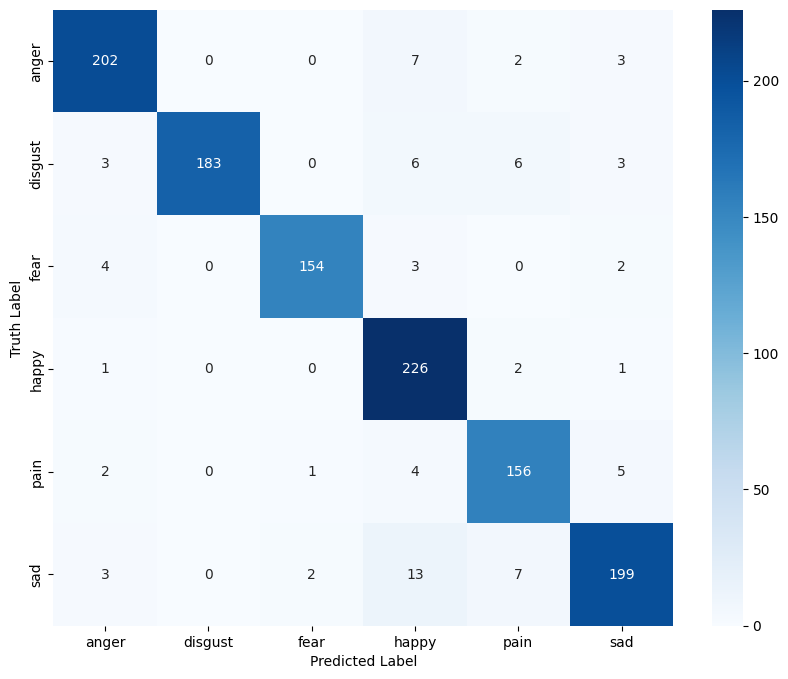

In [ ]:
cm = confusion_matrix(test_gen.classes, y_pred)
labels = classes
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()